Idea: get points of European Countries and compute the centroids. Check if France has the same centroid with overseas or not ;)

In [247]:
import geopandas as gpd
import pandas as pd
import shapely

In [290]:
df = gpd.read_file("data/ne_10m_admin_0_countries.shp",
    include_fields=["NAME", "CONTINENT", "geometry"])

In [291]:
df_eu = df["CONTINENT"] == "Europe" # creates a boolean "map"
df_eu = df[df_eu] # filters the dataframe using the boolean map
tr = df[df["NAME"] == "Turkey"] # adding Turkey
df_eu = pd.concat([df_eu, tr]) # concatenating the dataframes

<AxesSubplot:>

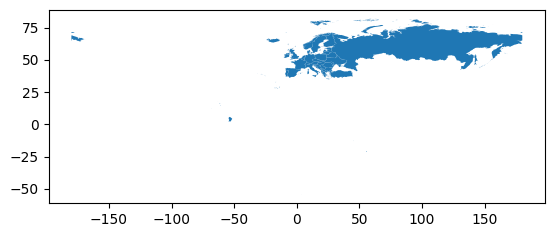

In [292]:
df_eu.plot()

looks good to me

In [318]:
centroids = [i[1].centroid for i in df_eu["geometry"].items()]
cdf = gpd.GeoDataFrame(centroids, columns=["geometry"])

In [319]:
type(cdf)

geopandas.geodataframe.GeoDataFrame

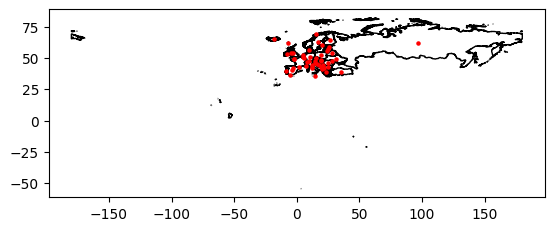

In [321]:
base = df_eu.plot(color='white', edgecolor='black')
cdf.plot(ax=base, marker='o', color='red', markersize=5);